# 🧾 Sign Language Gesture Recognition - MNIST Dataset
This notebook implements a **Custom CNN** model with augmentation for Sign Language Gesture Recognition using the Sign Language MNIST dataset.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

## Pre-Processing

In [4]:
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (27455, 785)
Test shape: (7172, 785)


C:\Users\SOURI\AppData\Local\Temp\ipykernel_23912\2293527106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_df, palette='viridis')
C:\Users\SOURI\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\SOURI\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly sel

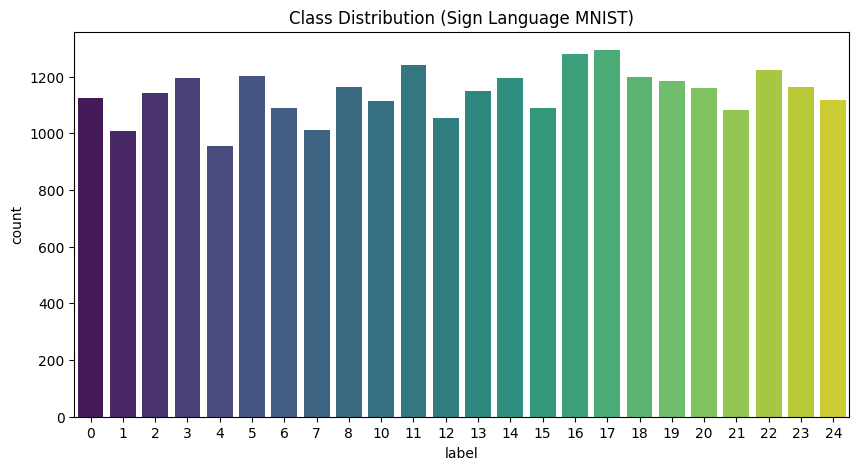

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(x='label', data=train_df, palette='viridis')
plt.title("Class Distribution (Sign Language MNIST)")
plt.show()

In [6]:
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (27455, 28, 28, 1)
Testing data shape: (7172, 28, 28, 1)


In [7]:
import numpy as np
unique_labels = np.unique(y_train)
label_to_index = {lab:i for i, lab in enumerate(sorted(unique_labels))}
if not np.array_equal(unique_labels, np.arange(len(unique_labels))):
    y_train = np.vectorize(label_to_index.get)(y_train)
    y_test  = np.vectorize(label_to_index.get)(y_test)
NUM_CLASSES = len(unique_labels)
print('NUM_CLASSES =', NUM_CLASSES, '| Train label range:', y_train.min(), 'to', y_train.max())

NUM_CLASSES = 24 | Train label range: 0 to 23


## Displaying the dataset images

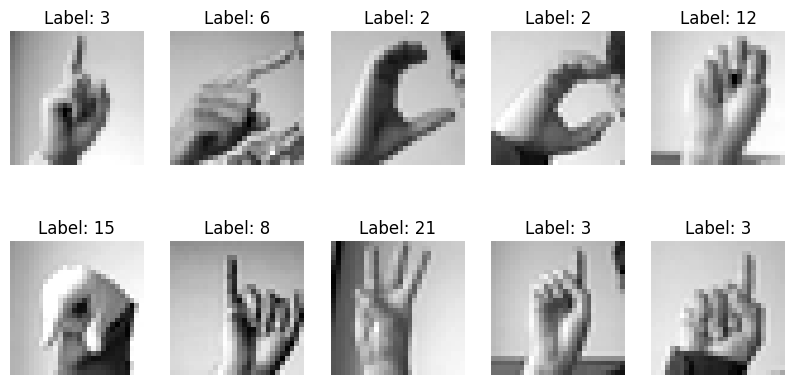

In [8]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title("Label: " + str(y_train[i]))
    plt.axis('off')
plt.show()

## Custom CNN architecture with Augmentation

In [9]:
from tensorflow.keras import backend as K
K.clear_session()

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

C:\Users\SOURI\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,224 (887.59 KB)

 Trainable params: 227,032 (886.84 KB)

 Non-trainable params: 192 (768.00 B)

In [10]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

## Hyper-Parameter Tuning

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pandas as pd
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

learning_rates = [1e-4, 5e-4, 1e-3, 5e-3]
batch_sizes = [32, 64, 128]
epochs = 100
results = []

best_val_acc = 0
best_history = None
best_lr = None
best_batch = None

for lr in learning_rates:
    for batch in batch_sizes:
        print(f"\nTraining model with learning_rate={lr}, batch_size={batch}\n")

        K.clear_session()
        cnn_model = Sequential([
            Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
            BatchNormalization(),
            MaxPooling2D(2,2),
            Conv2D(64, (3,3), activation='relu'),
            BatchNormalization(),
            MaxPooling2D(2,2),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(NUM_CLASSES, activation='softmax')
        ])

        cnn_model.compile(
            optimizer=Adam(learning_rate=lr),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        early_stop = EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True,
            verbose=1
        )

        history_cnn = cnn_model.fit(
            datagen.flow(X_train, y_train, batch_size=batch),
            epochs=epochs,
            validation_data=(X_test, y_test),
            callbacks=[early_stop],
            verbose=1
        )

        val_loss, val_acc = cnn_model.evaluate(X_test, y_test, verbose=0)
        best_epoch = history_cnn.history['val_loss'].index(min(history_cnn.history['val_loss'])) + 1

        print(f"Completed: LR={lr}, Batch={batch}, Best Epoch={best_epoch}, Val Acc={val_acc:.4f}, Val Loss={val_loss:.4f}")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_history = history_cnn
            best_lr = lr
            best_batch = batch

        results.append({
            'learning_rate': lr,
            'batch_size': batch,
            'best_epoch': best_epoch,
            'val_accuracy': val_acc,
            'val_loss': val_loss
        })

results_df = pd.DataFrame(results)
print("\nHyperparameter Tuning Results:")
display(results_df.sort_values(by='val_accuracy', ascending=False))

print(f"\nBest Hyperparameters: LR={best_lr}, Batch={best_batch}, Validation Accuracy={best_val_acc:.4f}, "
      f"Epoch={best_history.history['val_loss'].index(min(best_history.history['val_loss'])) + 1}")



Training model with learning_rate=0.0001, batch_size=32

Epoch 1/100


C:\Users\SOURI\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.3128 - loss: 2.3458 - val_accuracy: 0.7139 - val_loss: 0.9960
Epoch 2/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.5762 - loss: 1.3484 - val_accuracy: 0.8373 - val_loss: 0.5369
Epoch 3/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.6907 - loss: 0.9727 - val_accuracy: 0.9127 - val_loss: 0.3213
Epoch 4/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.7531 - loss: 0.7548 - val_accuracy: 0.9428 - val_loss: 0.2317
Epoch 5/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.8028 - loss: 0.6011 - val_accuracy: 0.9538 - val_loss: 0.1781
Epoch 6/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.8353 - loss: 0.5050 - val_accuracy: 0.9643 - val_loss: 0.1371
Epoch 7/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.8611 - loss: 0.4226 - val_accuracy: 0.9696 - val_loss: 0.1074
Epoch 8/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.8800 - loss: 0.3659 - val_

,learning_rate,batch_size,best_epoch,val_accuracy,val_loss
0,0.0001,32,24,0.996933,0.009550
5,0.0005,128,12,0.996793,0.016106
1,0.0001,64,25,0.996375,0.013216
2,0.0001,128,20,0.995259,0.028562
8,0.0010,128,10,0.994702,0.015773
4,0.0005,64,5,0.992192,0.037667
10,0.0050,64,9,0.989264,0.026832
7,0.0010,64,8,0.988288,0.037253
3,0.0005,32,3,0.986615,0.052674
9,0.0050,32,7,0.984663,0.061931



Best Hyperparameters: LR=0.0001, Batch=32, Validation Accuracy=0.9969, Epoch=24


## Displaying with the best parameters the CNN Model

In [11]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

K.clear_session()

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

cnn_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,224 (887.59 KB)

 Trainable params: 227,032 (886.84 KB)

 Non-trainable params: 192 (768.00 B)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

history_final = cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50


C:\Users\SOURI\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.3231 - loss: 2.3296 - val_accuracy: 0.6910 - val_loss: 1.1083
Epoch 2/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.5764 - loss: 1.3599 - val_accuracy: 0.8417 - val_loss: 0.5507
Epoch 3/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.6926 - loss: 0.9644 - val_accuracy: 0.9070 - val_loss: 0.3242
Epoch 4/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.7632 - loss: 0.7371 - val_accuracy: 0.9311 - val_loss: 0.2436
Epoch 5/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.8099 - loss: 0.5868 - val_accuracy: 0.9640 - val_loss: 0.1561
Epoch 6/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8416 - loss: 0.4792 - val_accuracy: 0.9784 - val_loss: 0.0991
Epoch 7/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8707 - loss: 0.4024 - val_accuracy: 0.9815 - val_loss: 0.0811
Epoch 8/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.8915 - loss: 0.3394 - val_accurac

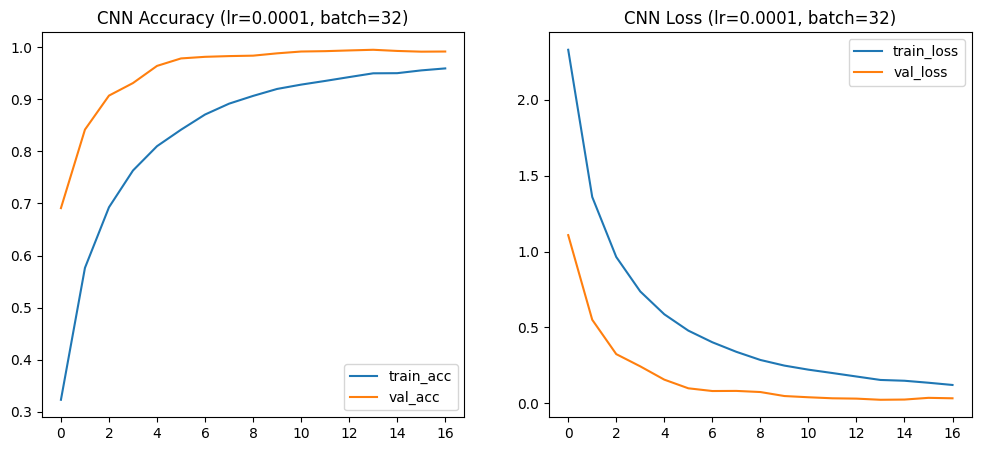

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_final.history['accuracy'], label='train_acc')
plt.plot(history_final.history['val_accuracy'], label='val_acc')
plt.title('CNN Accuracy (lr=0.0001, batch=32)')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_final.history['loss'], label='train_loss')
plt.plot(history_final.history['val_loss'], label='val_loss')
plt.title('CNN Loss (lr=0.0001, batch=32)')
plt.legend()
plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       0.99      1.00      0.99       348
           7       1.00      1.00      1.00       436
           8       1.00      1.00      1.00       288
           9       1.00      1.00      1.00       331
          10       1.00      1.00      1.00       209
          11       0.99      1.00      1.00       394
          12       1.00      0.97      0.98       291
          13       1.00      1.00      1.00       246
          14       1.00      1.00      1.00       347
          15       1.00      

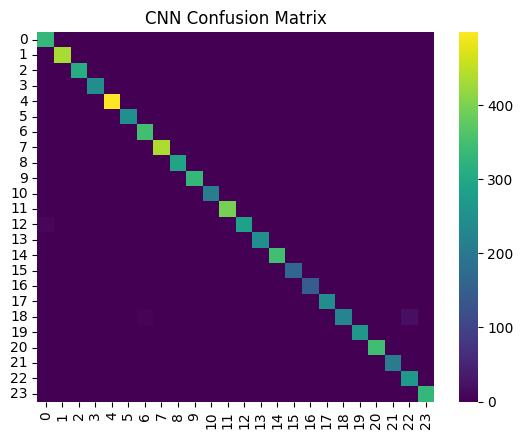

In [15]:
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)
print("Classification Report:\n", classification_report(y_test, y_pred_cnn))
sns.heatmap(confusion_matrix(y_test, y_pred_cnn), cmap='viridis', annot=False)
plt.title("CNN Confusion Matrix")
plt.show()

In [16]:
cnn_model.save('cnn_sign_language_model.h5')

## Displaying Actual and Predicted with random samples

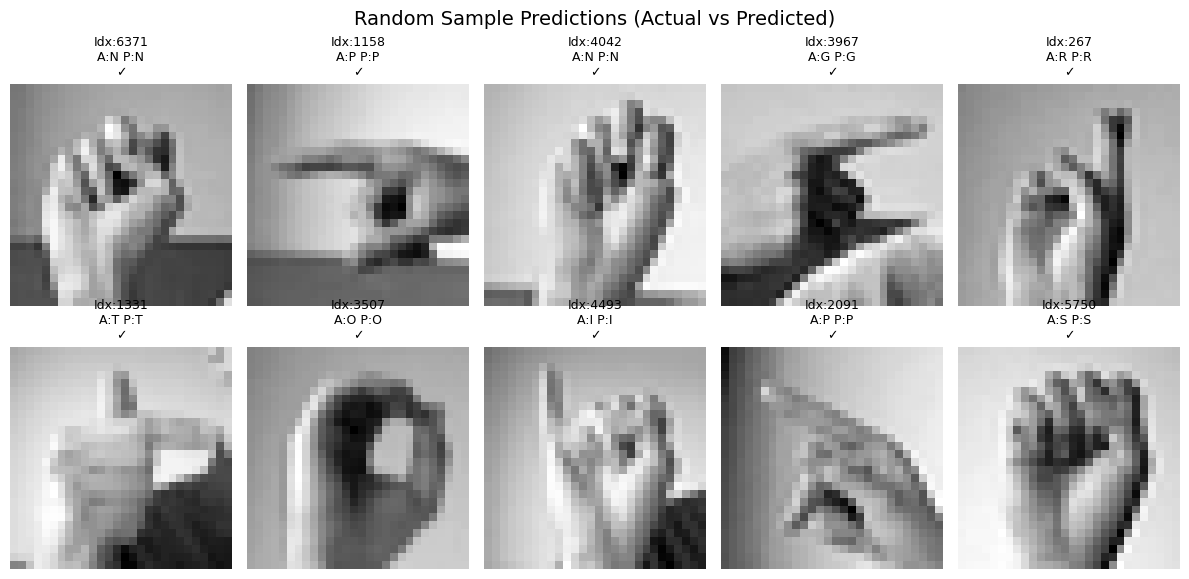

Sample indices shown: [6371 1158 4042 3967  267 1331 3507 4493 2091 5750]
Correct count: 10 / 10


In [23]:
import string
import numpy as np
import matplotlib.pyplot as plt

letters = [ch for ch in string.ascii_uppercase if ch != 'J']
index_to_letter = {i: l for i, l in enumerate(letters)}

num_samples = 10         
seed = None              

if seed is not None:
    np.random.seed(seed)

sample_indices = np.random.choice(len(X_test), size=num_samples, replace=False)

if 'y_pred_cnn' not in globals():
    y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)

plt.figure(figsize=(12, 6))
for plot_pos, test_idx in enumerate(sample_indices, start=1):
    ax = plt.subplot(2, 5, plot_pos)
    img = X_test[test_idx].reshape(28, 28)
    actual = index_to_letter[y_test[test_idx]]
    predicted = index_to_letter[y_pred_cnn[test_idx]]
    correct = actual == predicted
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Idx:{test_idx}\nA:{actual} P:{predicted}' + ('\n✓' if correct else '\n✗'), fontsize=9)
    ax.axis('off')

plt.suptitle('Random Sample Predictions (Actual vs Predicted)', fontsize=14)
plt.tight_layout()
plt.show()

print('Sample indices shown:', sample_indices)
print('Correct count:', sum(index_to_letter[y_test[i]] == index_to_letter[y_pred_cnn[i]] for i in sample_indices), '/', num_samples)